## Using Beam Solver
BeamSolver allows the user to create and solve for statically determinate beams. The beams are limited to statically determinate problems and the package will raise errors if this condition isn't met.

### Creating a Beam
Beams can be created through a config file or from scratch. The provided config files: 'supported_beam_example.toml' and 'cantilever_beam_example.toml' provide the structure that must be followed to add features onto the beam.

## Cantilever Beam Example
Utilizing the Config File the beam object can be created and illustrated by pysketcher

C:\Users\Felipes PC\anaconda3\lib\site-packages\pysketcher\backend\matplotlib\_matplotlib_backend.py:68: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



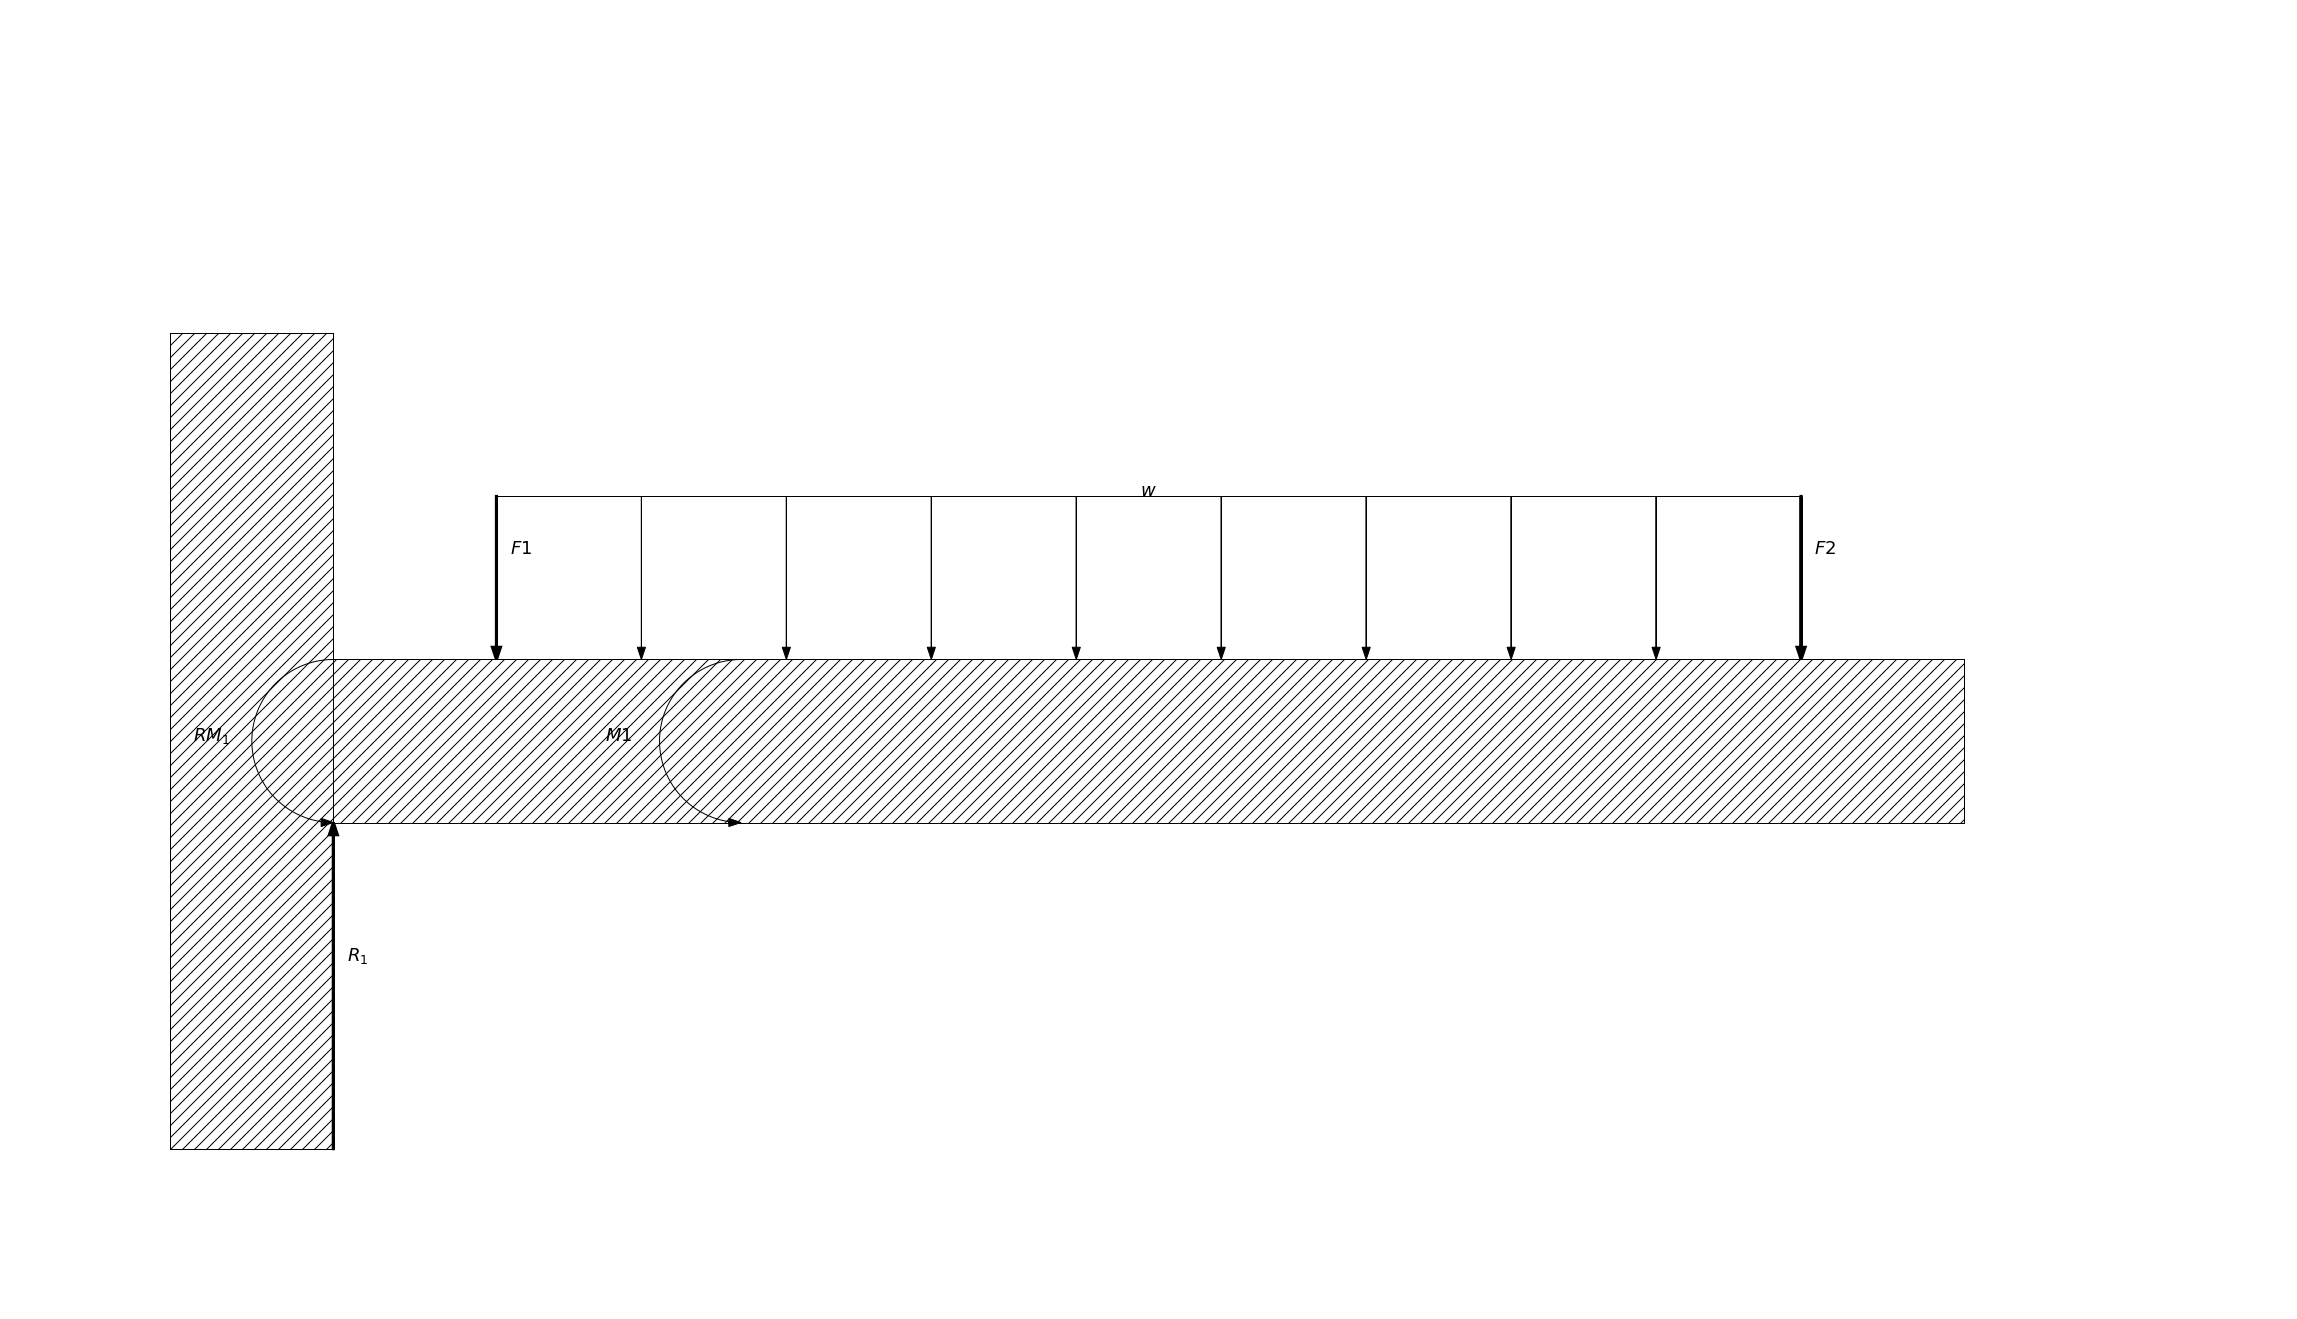

In [6]:
#Utilizing the config file
from BeamSolver import read_properties

#read_properties allows you to use a config_file to create the beam
beam = read_properties('cantilever_beam_example.toml')


beam.show_beam()

Calculations haven't been made yet on the beam. Calculations are made through the calculate_forces() method and shear_moment_calculation. THe calculate_forces() method finds the support reactions. The shear_moment_calculation() produces a shear and moment array.

These methods are automatically used if you use the diagrams() method.

Units:
Distance measurements: [m],
Forces: [N],
Moments: [Nm],
Distributed Loads: [N/m]


In [11]:
print(beam.support_dictionary)
print(beam.moment_dictionary)

{'magnitude': [], 'position': [], 'type': []}
{'magnitude': [7], 'position': [5], 'name': ['M1']}


In [7]:
beam.calculate_forces()
print(beam.support_dictionary)
print(beam.moment_dictionary)

{'magnitude': [200], 'position': [0], 'type': ['fixed']}
{'magnitude': [7, 1993.0], 'position': [5, 0], 'name': ['M1', 'RM1']}


In [14]:
beam.shear_moment_calculation()
shear= beam.shear
bmoment=beam.moment
#Uncomment the statement if you'd like to see the veryyy large array

#print(shear)

### The Beam objects can also be used to produce shear force and moment diagrams for the beam.
#### (Sometimes the Plotly graphs have to be reloaded to be viewed)

C:\Users\Felipes PC\anaconda3\lib\site-packages\pysketcher\backend\matplotlib\_matplotlib_backend.py:68: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



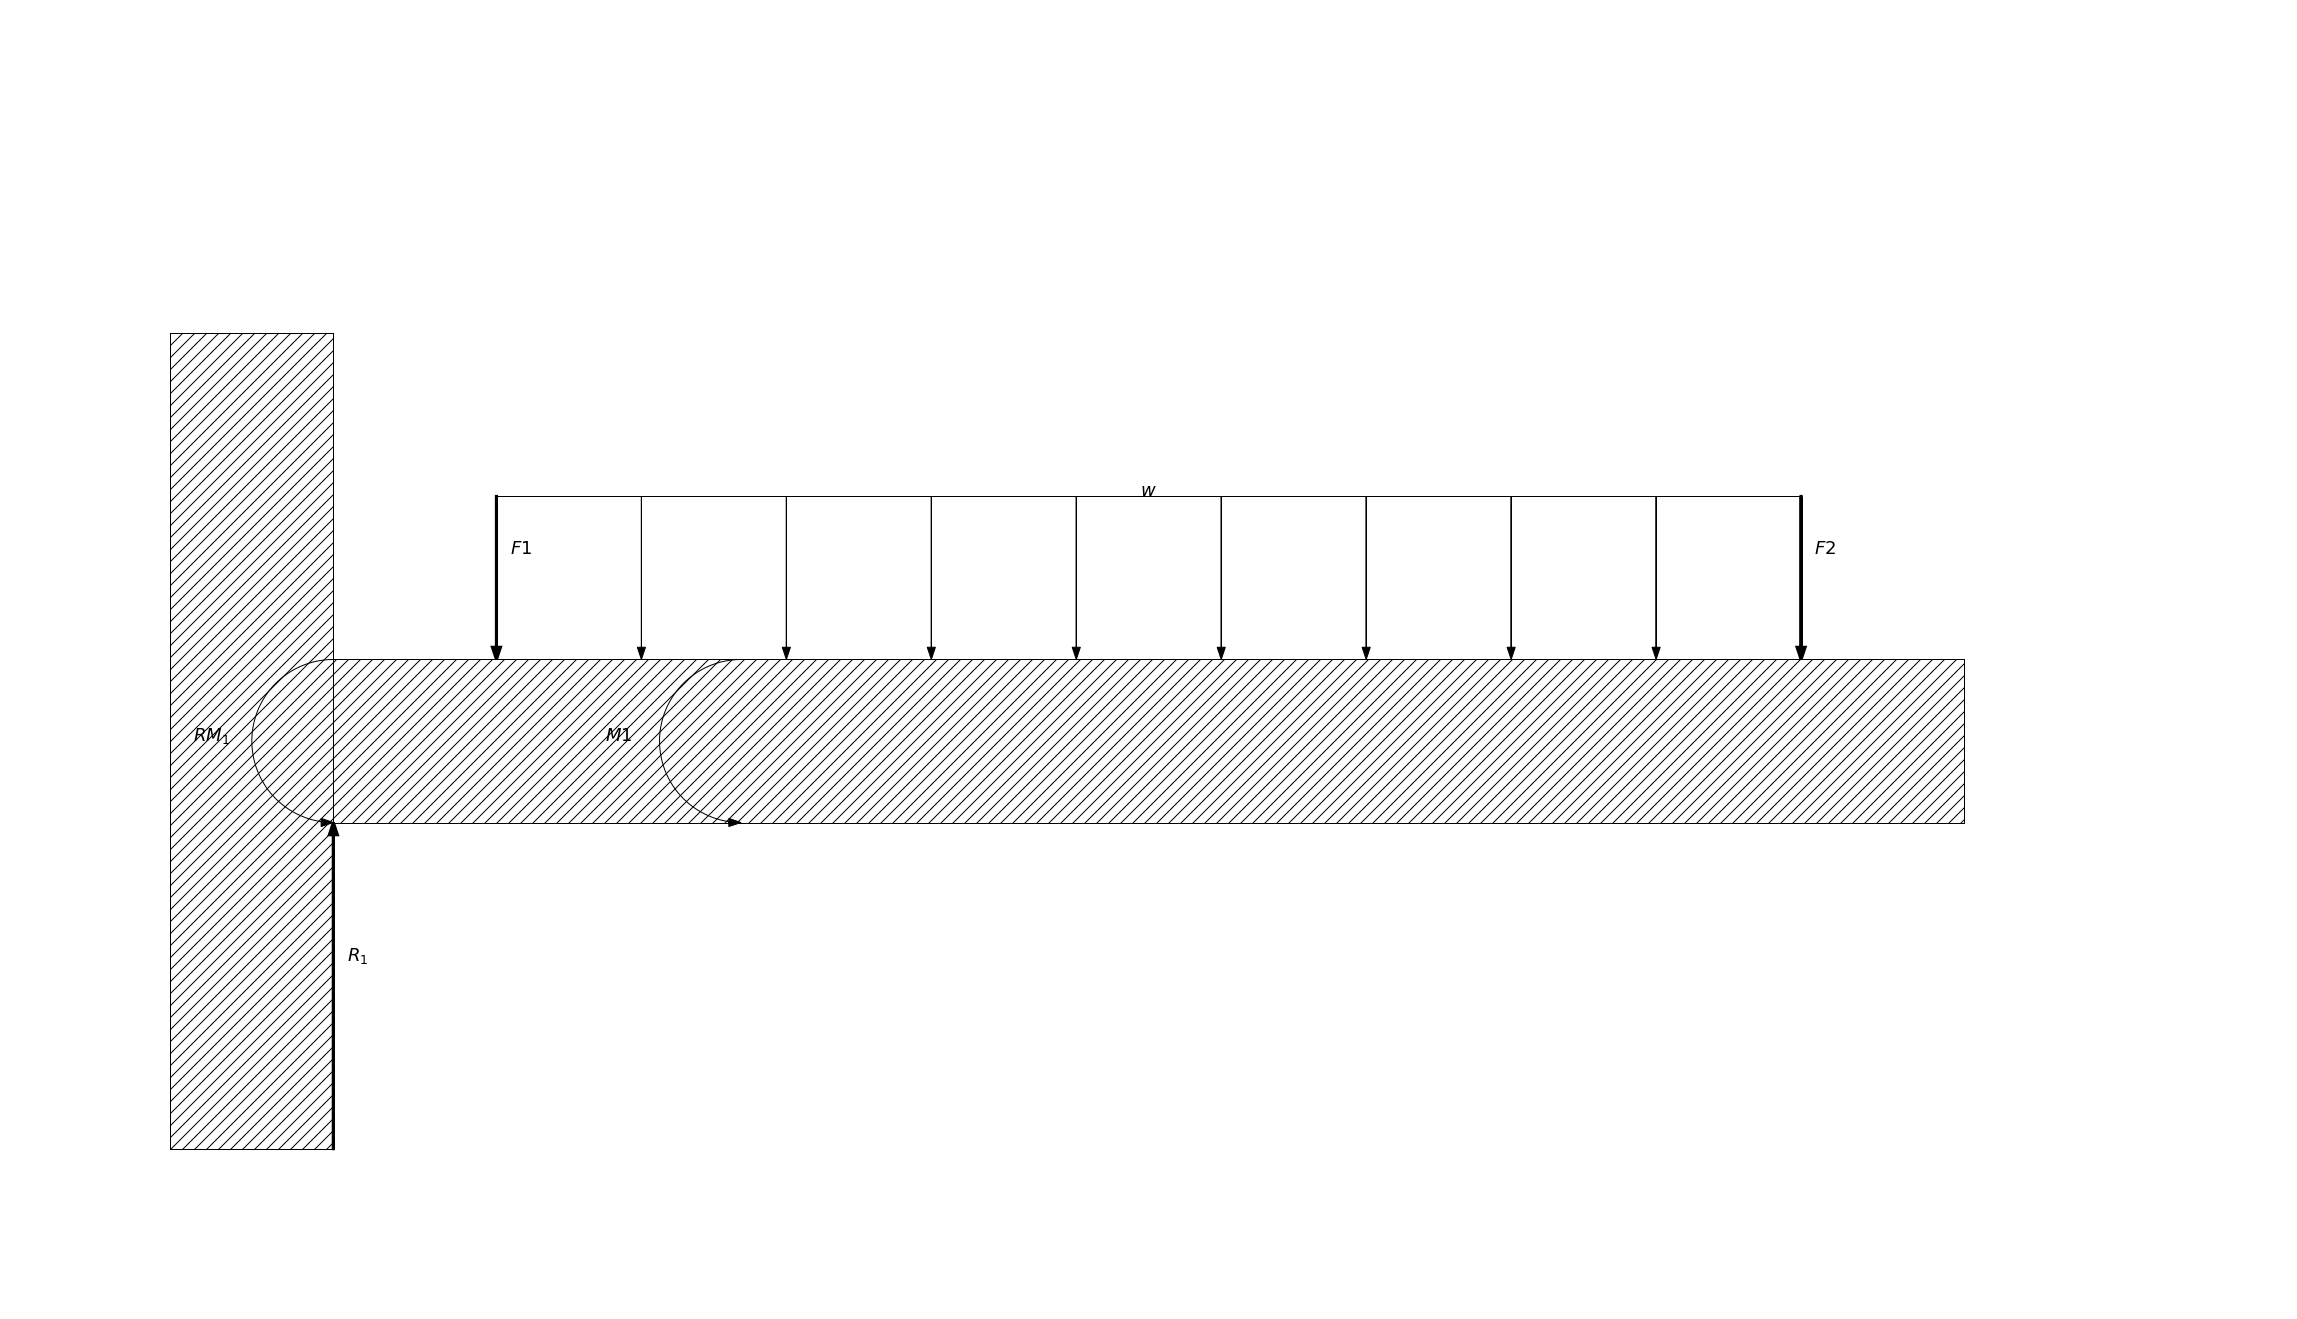

In [9]:
beam = read_properties('cantilever_beam_example.toml')
beam.diagrams()

There are a bunch of attributes that can be extracted from the beam, incase you want to do further analysis or extract solved values.

Length, height, shear values, moment values, force/moment/support/distributed_load dictionaries.

In [12]:
length= beam.length
height = beam.beam_height
forces = beam.force_dictionary
distributed_loads = beam.UDL_dictionary
print(f'The beam is {length} m long')
print(f'The beam has a height of {height} m')
print(forces) #The resultant force of the distributed load is included.
print(distributed_loads)

The beam is 20 m long
The beam has a height of 1 m
{'magnitude': [-20, -20, -160], 'position': [2, 18, 10.0], 'type': ['PT', 'PT', 'UDL']}
{'magnitude': [-160], 'position': [2], 'distributed_load': [-10], 'end_position': [18]}


## Supported Beam Example

#### Beams can also be constructed from scratch by intializing a beam object and building it feature by feature.

C:\Users\Felipes PC\anaconda3\lib\site-packages\pysketcher\backend\matplotlib\_matplotlib_backend.py:68: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



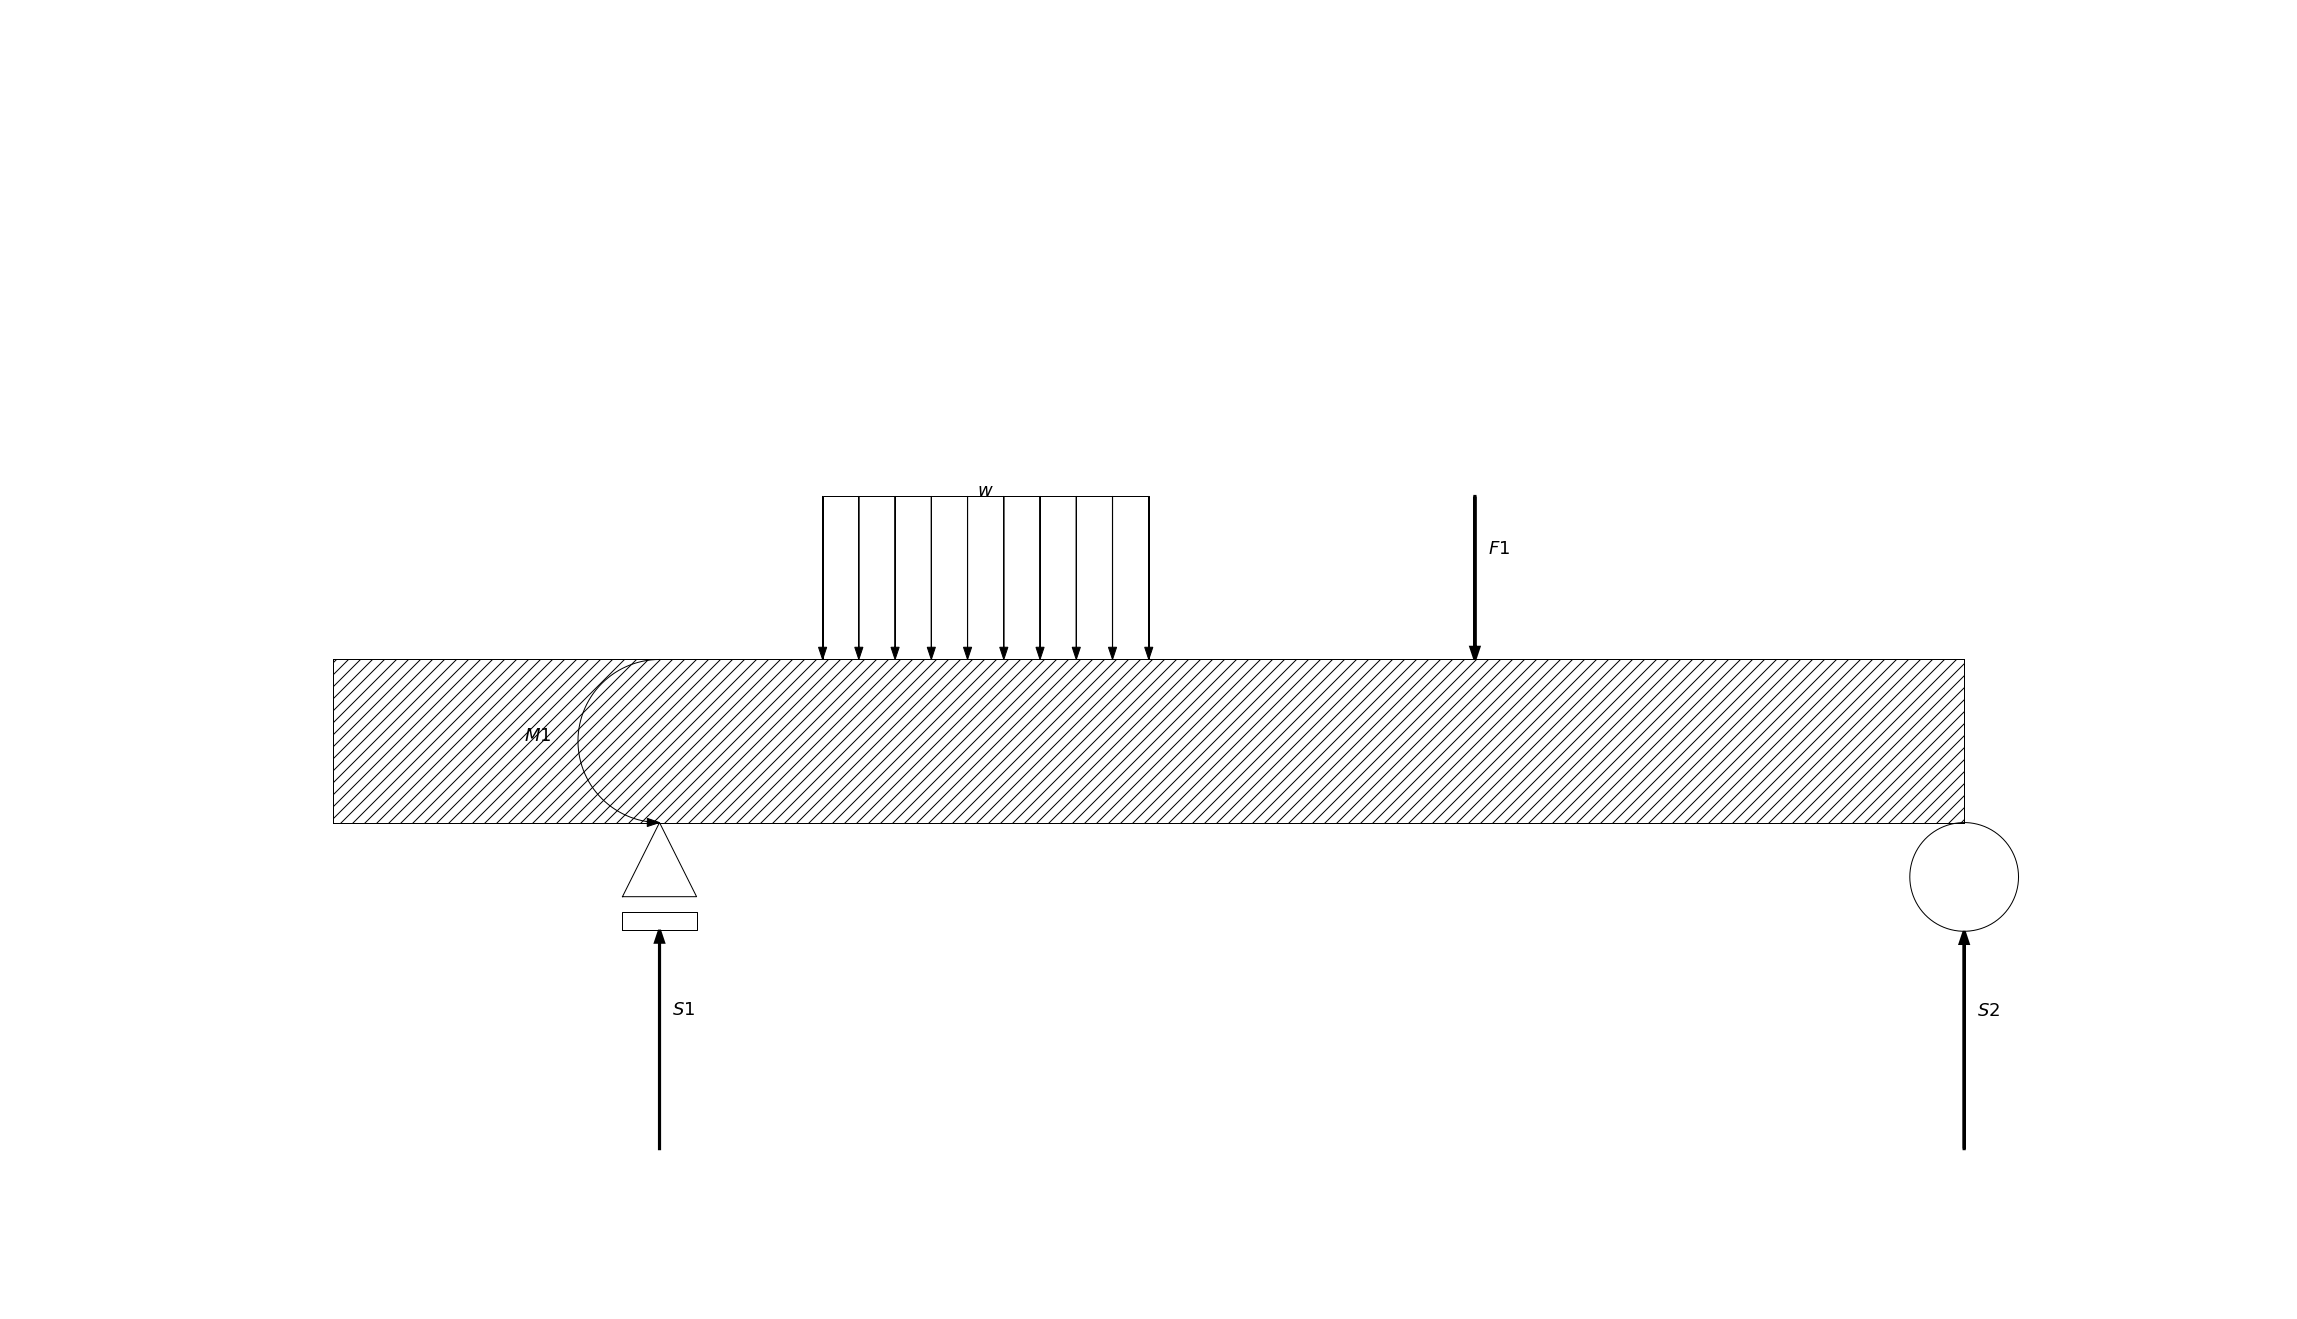

In [4]:
from BeamSolver import Supported_Beam
scratch_beam = Supported_Beam(length=10,height=2)
scratch_beam.fixed_support(name = 'S1',position= 2)
scratch_beam.roller_support(name = 'S2',position= 10)
scratch_beam.point_force(name= 'F1', position = 7, magnitude= 5)
scratch_beam.moment(name='M1', position=2, magnitude = 3)
scratch_beam.uniform_load(name = 'L1',start = 3,end = 5, distributed_load = 5)
scratch_beam.diagrams()


#### There's also an example supported beam provided as supported_beam_example.toml

C:\Users\Felipes PC\anaconda3\lib\site-packages\pysketcher\backend\matplotlib\_matplotlib_backend.py:68: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



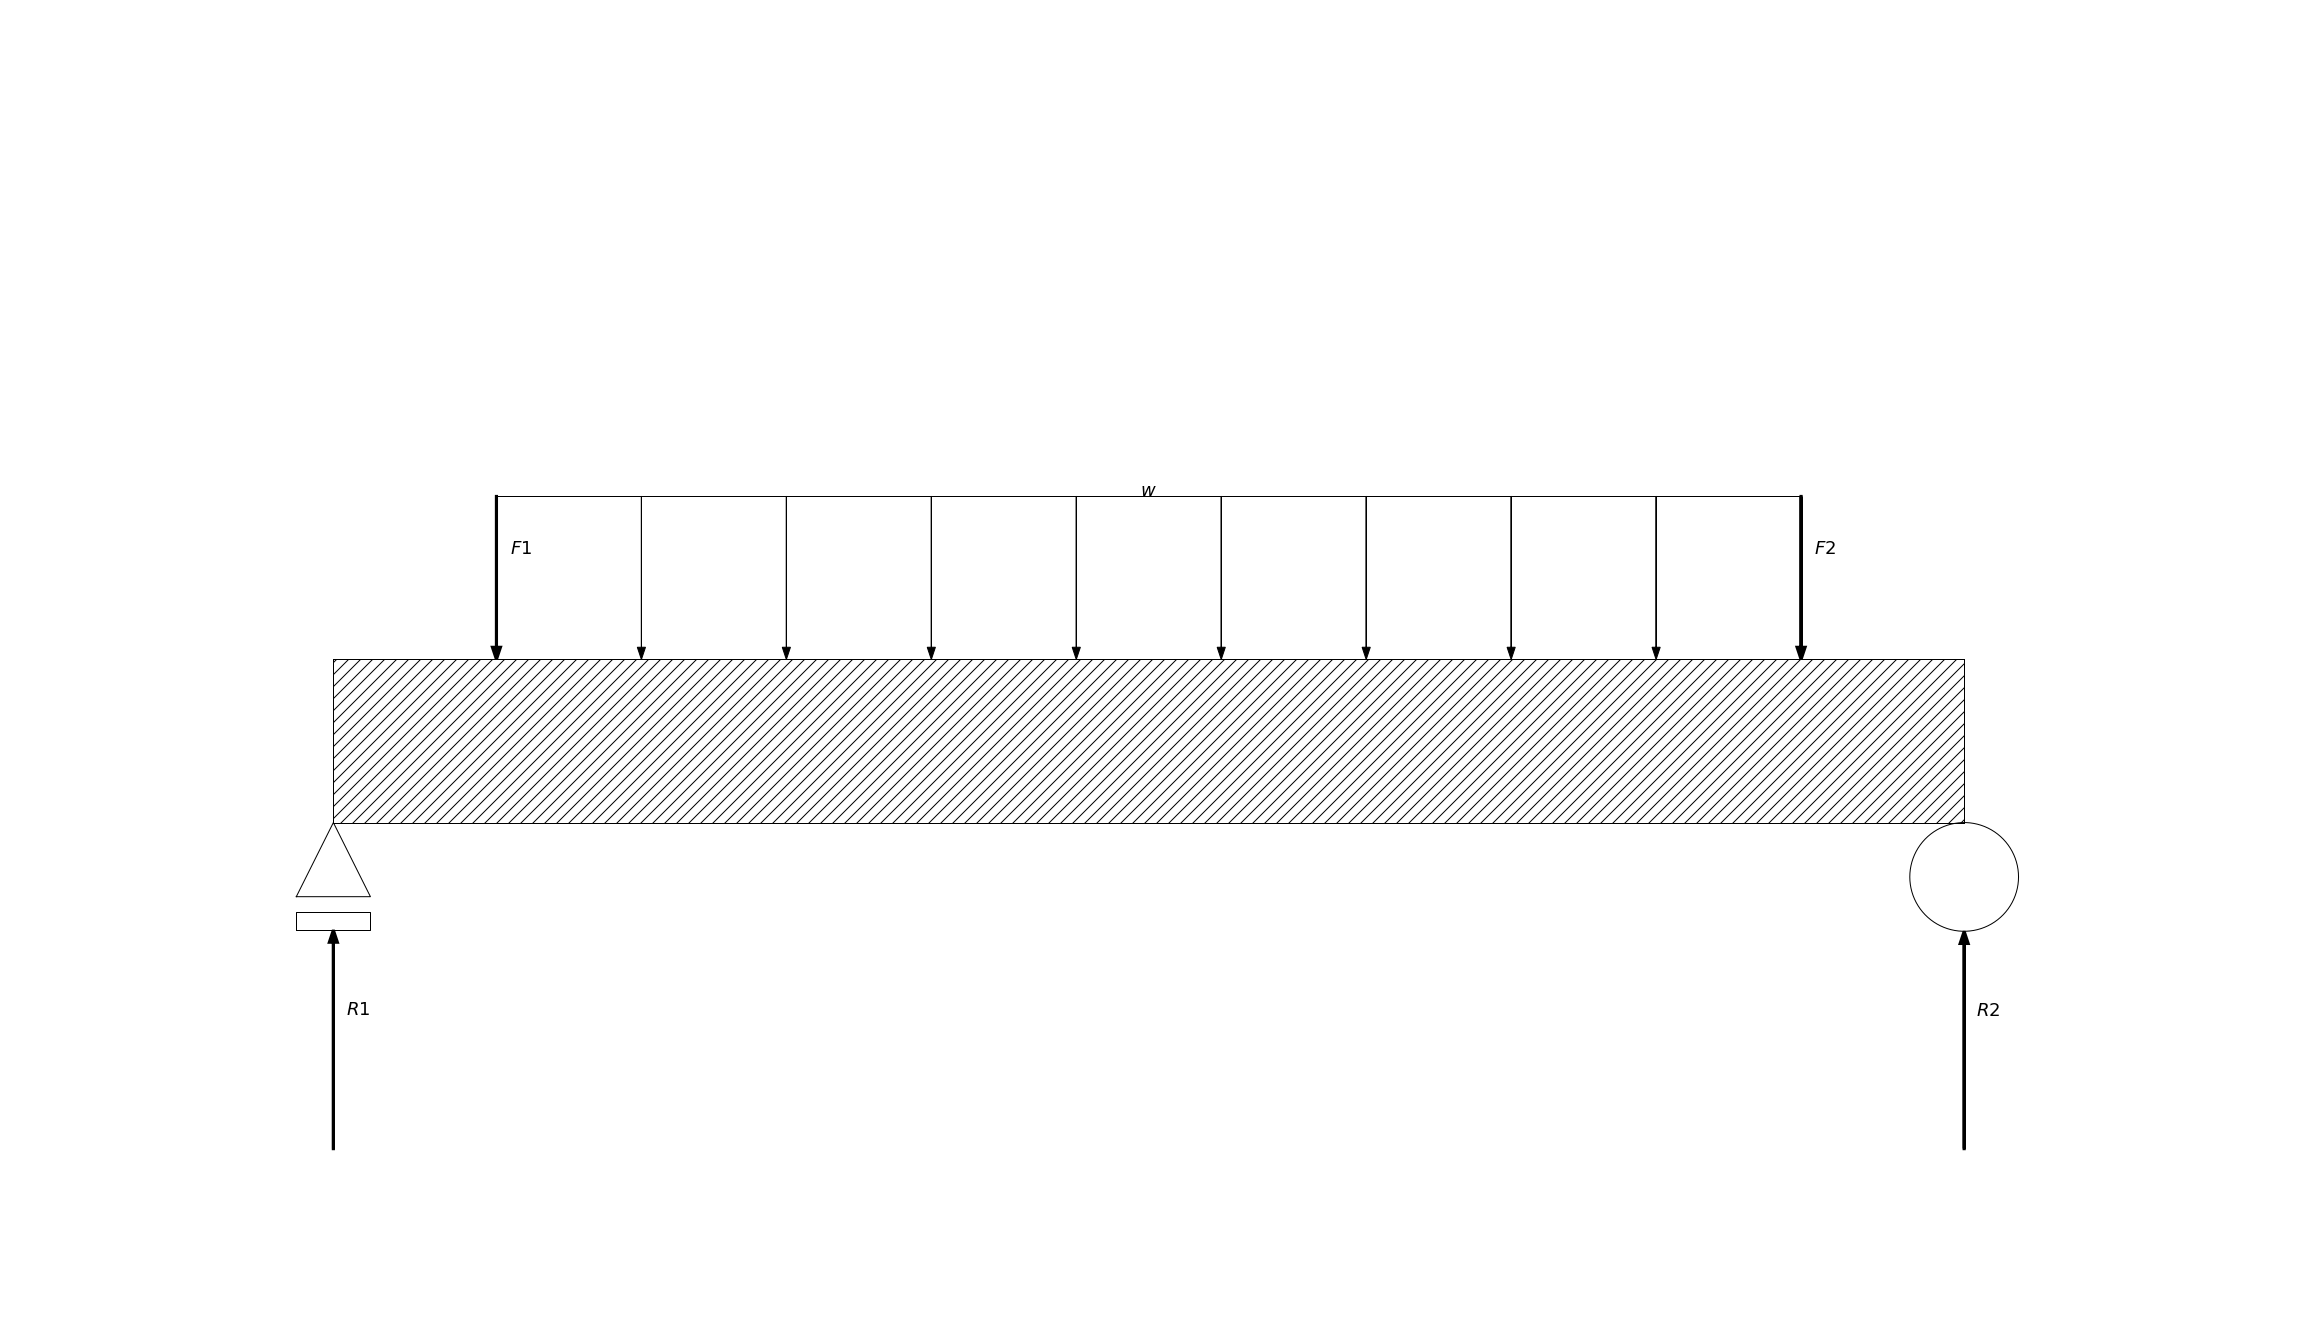

In [19]:
from BeamSolver import read_properties

#read_properties allows you to use a config_file to create the beam
beam = read_properties('supported_beam_example.toml')
beam.diagrams()